# Migration

Brian Russell's migration exercise.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

First we'll just try to replicate the tutorial.

In [2]:
from sympy import Point, Line, Ray, Segment

In [3]:
# Define the geometry
origin = Point(0, 0)
dip = -26.6  # degrees

# Positions of source and receiver
s = Point(10, 0)
r = Point(30, 0)

# Not sure how to interpolate in sympy... easy in shapely
m = Point(20, 0)

In [4]:
# Reflector
x = np.arange(0,40)
y = x * np.tan(np.radians(dip))

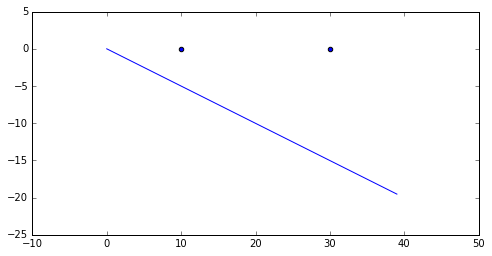

In [5]:
plt.figure(figsize=(8,4))
plt.plot(x, y)
plt.scatter(*s)
plt.scatter(*r)
plt.show()

In [6]:
r_ray = Ray(origin, angle=np.radians(dip)) # How to plot this?

In [7]:
# Find reflection point
#s__ = reflector.projection(s)

# or

# seg = Segment(s, s__)

def reflector(m):
    a = 1 / (1 + m**2)
    b = np.array([[1 - m**2, 2*m], [2*m, m**2 - 1]])
    return a * b

def reflect(point, angle):
    r = reflector(np.tan(np.radians(angle)))
    return np.array([point.x, point.y]).astype(float) @ r

In [8]:
s_ = reflect(s, -26)

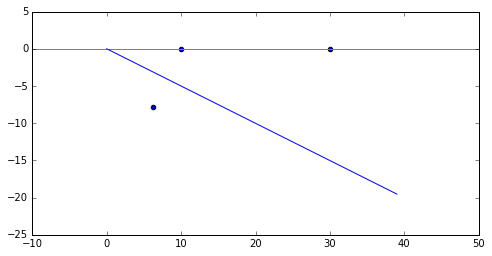

In [9]:
plt.figure(figsize=(8,4))
plt.axhline(0, c='gray')
plt.plot(x, y)
plt.scatter(*s)
plt.scatter(*s_)

plt.scatter(*r)
plt.show()

In [10]:
p, = r_ray.intersection(Line(s_, r))

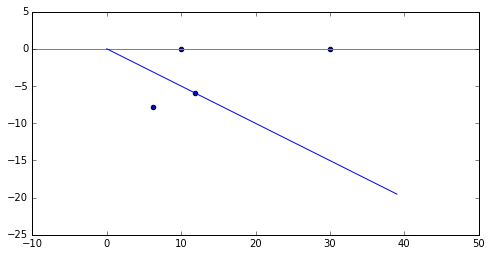

In [11]:
plt.figure(figsize=(8,4))
plt.axhline(0, c='gray')
plt.plot(x, y)
plt.scatter(*s)
plt.scatter(*s_)
plt.scatter(*r)
plt.scatter(*p)
plt.show()

In [12]:
from matplotlib.patches import Ellipse
from matplotlib.collections import PatchCollection


In [13]:
l = (s.distance(p) + p.distance(r))/2  # Length of each raypath.
h = s.distance(r) / 2
d = np.sqrt(float(l**2 - h**2))

In [14]:
d

7.7556447371693604

In [15]:
ellipses = []
ellipses.append(Ellipse(m, 2* l, 2 * d))

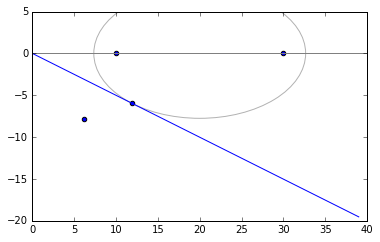

In [16]:
fig = plt.figure(0)
ax = fig.add_subplot(111, aspect='equal')
patches = PatchCollection(ellipses, facecolor='none', alpha=0.3)
ax.add_collection(patches)

plt.axhline(0, c='gray')
ax.plot(x, y)
ax.scatter(*s)
ax.scatter(*s_)
ax.scatter(*r)
ax.scatter(*p)
ax.set_xlim(0, 40)
ax.set_ylim(-20, 5)
plt.show()

In [17]:
ellipses = []

for i in range(0, 20, 2):
    for j in range(20, 40, 2):
        s = Point(i, 0)
        r = Point(j, 0)
        m = Point(i+j/2, 0)
        s_ = reflect(s, dip)
        p, = r_ray.intersection(Line(s_, r))
        l = (s.distance(p) + p.distance(r))/2
        h = s.distance(r) / 2
        d = np.sqrt(float(l**2 - h**2))
        ellipses.append(Ellipse(m, 2*l, 2*d))

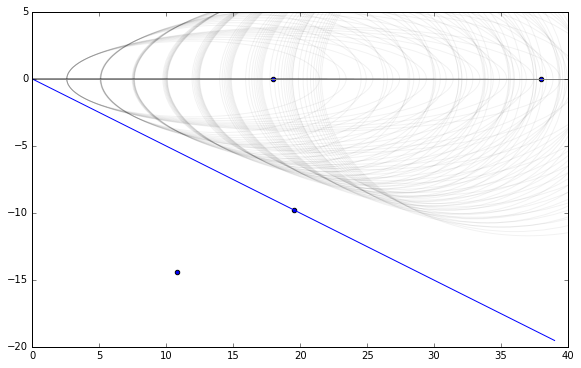

In [18]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, aspect='equal')
patches = PatchCollection(ellipses, facecolor='none', alpha=0.05)
ax.add_collection(patches)

plt.axhline(0, c='gray')
ax.plot(x, y)
ax.scatter(*s)
ax.scatter(*s_)
ax.scatter(*r)
ax.scatter(*p)
ax.set_xlim(0, 40)
ax.set_ylim(-20, 5)
plt.show()

In [178]:
len(ellipses)

401